In [29]:
# 1. Importación de librerías
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


df1 = pd.read_csv(r"C:\Users\aleim\OneDrive\Documentos\UNAD\Primer semestre 2025\Analisis de Datos\Tarea 3\Dataset Regresión Lineal\car data.csv")
df2 = pd.read_csv(r"C:\Users\aleim\OneDrive\Documentos\UNAD\Primer semestre 2025\Analisis de Datos\Tarea 3\Dataset Regresión Lineal\CAR DETAILS FROM CAR DEKHO.csv")
df3 = pd.read_csv(r"C:\Users\aleim\OneDrive\Documentos\UNAD\Primer semestre 2025\Analisis de Datos\Tarea 3\Dataset Regresión Lineal\Car details v3.csv")
df4 = pd.read_csv(r"C:\Users\aleim\OneDrive\Documentos\UNAD\Primer semestre 2025\Analisis de Datos\Tarea 3\Dataset Regresión Lineal\car details v4.csv")


df1 = df1.rename(columns={
    'Year': 'year',
    'Kms_Driven': 'km_driven',
    'Fuel_Type': 'fuel',
    'Seller_Type': 'seller_type',
    'Transmission': 'transmission',
    'Owner': 'owner',
    'Selling_Price': 'selling_price'
})
df1 = df1[['year', 'km_driven', 'fuel', 'seller_type', 'transmission', 'owner', 'selling_price']]
df2 = df2[['year', 'km_driven', 'fuel', 'seller_type', 'transmission', 'owner', 'selling_price']]
df3 = df3[['year', 'km_driven', 'fuel', 'seller_type', 'transmission', 'owner', 'selling_price']]
df4 = df4.rename(columns={
    'Year': 'year',
    'Kilometer': 'km_driven',
    'Fuel Type': 'fuel',
    'Seller Type': 'seller_type',
    'Transmission': 'transmission',
    'Owner': 'owner',
    'Price': 'selling_price'
})
df4 = df4[['year', 'km_driven', 'fuel', 'seller_type', 'transmission', 'owner', 'selling_price']]


df_unido = pd.concat([df1, df2, df3, df4], ignore_index=True)
df_unido['age'] = 2025 - df_unido['year']

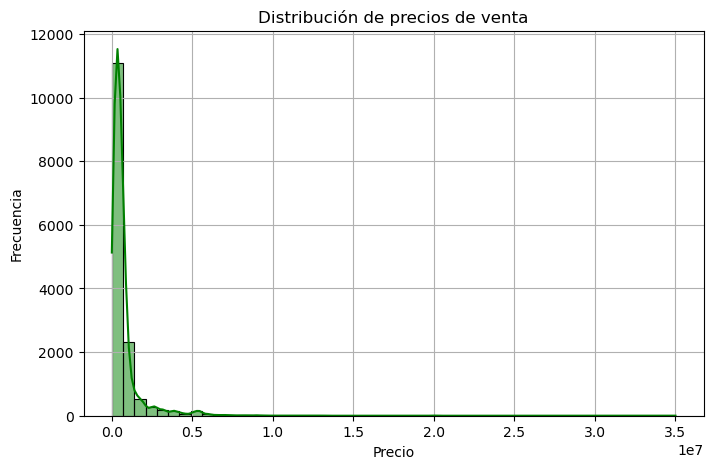

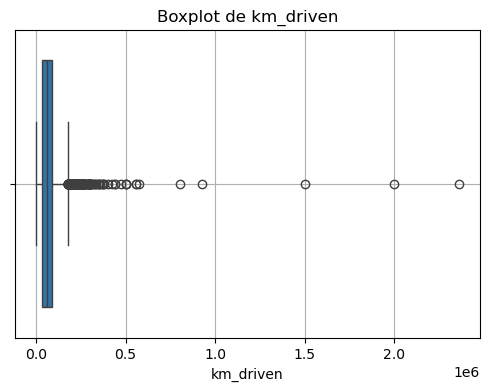

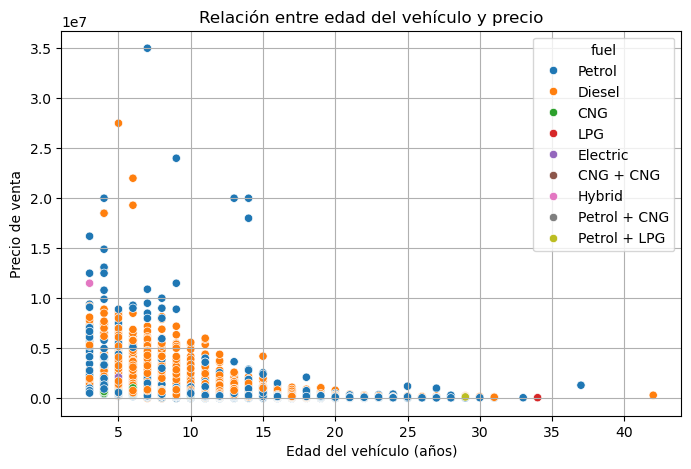

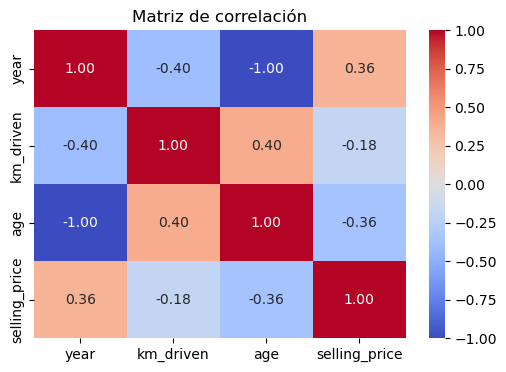

In [31]:
plt.figure(figsize=(8,5))
sns.histplot(df_unido['selling_price'], bins=50, kde=True, color='green')
plt.title("Distribución de precios de venta")
plt.xlabel("Precio")
plt.ylabel("Frecuencia")
plt.grid()
plt.show()

plt.figure(figsize=(6, 4))
sns.boxplot(x=df_unido['km_driven'])
plt.title("Boxplot de km_driven")
plt.grid()
plt.show()

plt.figure(figsize=(8, 5))
sns.scatterplot(data=df_unido, x='age', y='selling_price', hue='fuel')
plt.title("Relación entre edad del vehículo y precio")
plt.xlabel("Edad del vehículo (años)")
plt.ylabel("Precio de venta")
plt.grid()
plt.show()

df_corr = df_unido[['year', 'km_driven', 'age', 'selling_price']].corr()
plt.figure(figsize=(6, 4))
sns.heatmap(df_corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Matriz de correlación")
plt.show()

In [33]:
df_unido.dropna(inplace=True)
df_unido.drop_duplicates(inplace=True)

df_procesado = pd.get_dummies(df_unido, columns=['fuel', 'seller_type', 'transmission', 'owner'], drop_first=True)


In [35]:
X = df_procesado.drop(['selling_price', 'year'], axis=1)
y = df_procesado['selling_price']

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [39]:
modelo_rl = LinearRegression()
modelo_rl.fit(X_train, y_train)

LinearRegression()

In [43]:
from sklearn.metrics import root_mean_squared_error, r2_score

y_pred = modelo_rl.predict(X_test)
rmse = root_mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"RMSE: {rmse:.2f}")
print(f"R²: {r2:.2f}")

RMSE: 1096379.77
R²: 0.32


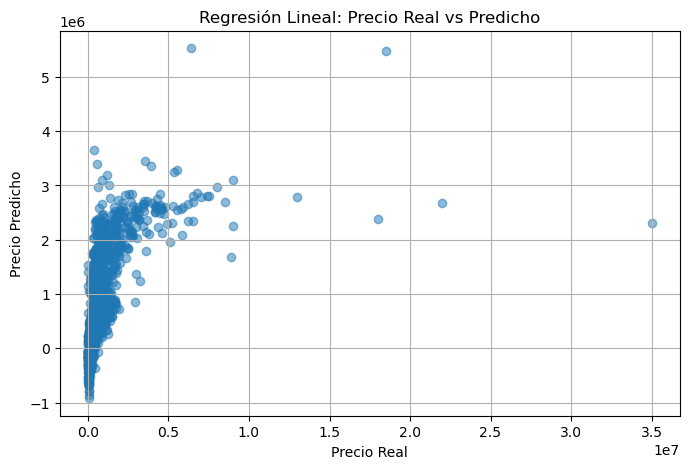

In [45]:
plt.figure(figsize=(8, 5))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel("Precio Real")
plt.ylabel("Precio Predicho")
plt.title("Regresión Lineal: Precio Real vs Predicho")
plt.grid()
plt.show()